In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# making a list of missing value types
missing_values = ["-1", "0", "?"]
# Reading training datasets
alternative = pd.read_csv("alternative.csv", na_values = missing_values)
anime = pd.read_csv("anime.csv", na_values = missing_values)
blues = pd.read_csv("blues.csv", na_values = missing_values)
classical = pd.read_csv("classical.csv", na_values = missing_values)
country = pd.read_csv("country.csv", na_values = missing_values)
electronic = pd.read_csv("electronic.csv", na_values = missing_values)
hiphop = pd.read_csv("hip-hop.csv", na_values = missing_values)
jazz = pd.read_csv("jazz.csv", na_values = missing_values)
rap = pd.read_csv("rap.csv", na_values = missing_values)
rock = pd.read_csv("rock.csv", na_values = missing_values)

In [82]:
datasets = \
    [alternative, anime, blues, classical, country, electronic, hiphop, jazz, rap, rock]

datasets_name = ["Alternative", "Anime", "Blues", "Classical", "Country", "Electronic",
                 "Hiphop", "Jazz", "Rap", "Rock"]

concatenate_dataset = pd.concat([alternative, anime, blues, classical, country, electronic,
                                 hiphop, jazz, rap, rock])

In [6]:
# first look of dataset
concatenate_dataset

,instance_id,artist_name,track_hash,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,34428,Type O Negative,0iMN420Q45isZVNlAqzPTW,Love You to Death,48.0,0.35900,0.423,428800.0,0.738,0.084000,F#,0.0801,-7.329,Major,0.0319,111.414,4-Apr,0.276,Alternative
1,76036,Atmosphere,0Ft0qrlHO6dvV8qTcpltub,Puppets,46.0,0.29900,0.733,221787.0,0.444,0.000003,E,0.1040,-7.170,Major,0.1150,89.106,4-Apr,0.372,Alternative
2,37341,Hawk Nelson,0i1YwWmVoNlAckK2ej9K4I,Never Let You Down,43.0,0.29700,0.666,262560.0,0.740,NaN,G,0.1450,-5.908,Minor,0.0375,124.911,4-Apr,0.620,Alternative
3,85209,Nothing But Thieves,0HVyFhnBlnu70TLb7s465K,Honey Whiskey,49.0,0.02360,0.561,191947.0,0.764,0.000014,C#,0.2090,-5.175,Major,0.0422,90.004,4-Apr,0.657,Alternative
4,26964,The Score,0ZjEZWUz3QzI2OB3jU29VB,Where You Are,43.0,0.00972,0.652,226333.0,0.813,0.000041,F#,0.2900,-4.737,Major,0.0410,124.000,4-Apr,0.560,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,77890,Weezer,7hI6KmUkRRCpoHINKL1WB9,Happy Together,65.0,0.17100,0.444,145640.0,0.943,0.000007,F#,0.2970,-3.724,Minor,0.1040,125.896,4-Apr,0.411,Rock
4996,84481,A Perfect Circle,4YSSB7ZtqVnbsxybS5NHJC,The Package,53.0,0.00358,0.765,460493.0,0.397,0.715000,A,0.1170,-10.538,Major,0.0359,123.890,4-Apr,0.150,Rock
4997,61577,James Taylor,7iqWZNpHBAK5jE6e9gPKj9,Sweet Baby James,60.0,0.44200,0.512,171093.0,0.239,NaN,D,0.0930,-15.055,Major,0.0353,141.292,3-Apr,0.634,Rock
4998,50216,The Modern Lovers,4ypa0o9O8nBXkPkjRaT7nU,Pablo Picasso,55.0,0.00269,0.617,261600.0,0.729,0.131000,D,0.1090,-9.174,Major,0.0306,109.638,4-Apr,0.835,Rock


In [150]:
#shape of dataset
concatenate_dataset.shape

(50000, 19)

In [151]:
concatenate_dataset.head()

,instance_id,artist_name,track_hash,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,34428,Type O Negative,0iMN420Q45isZVNlAqzPTW,Love You to Death,48,0.35900,0.423,428800,0.738,0.084000,F#,0.0801,-7.329,Major,0.0319,111.414,4-Apr,0.276,Alternative
1,76036,Atmosphere,0Ft0qrlHO6dvV8qTcpltub,Puppets,46,0.29900,0.733,221787,0.444,0.000003,E,0.1040,-7.170,Major,0.1150,89.10600000000001,4-Apr,0.372,Alternative
2,37341,Hawk Nelson,0i1YwWmVoNlAckK2ej9K4I,Never Let You Down,43,0.29700,0.666,262560,0.740,0.000000,G,0.1450,-5.908,Minor,0.0375,124.911,4-Apr,0.620,Alternative
3,85209,Nothing But Thieves,0HVyFhnBlnu70TLb7s465K,Honey Whiskey,49,0.02360,0.561,191947,0.764,0.000014,C#,0.2090,-5.175,Major,0.0422,90.00399999999999,4-Apr,0.657,Alternative
4,26964,The Score,0ZjEZWUz3QzI2OB3jU29VB,Where You Are,43,0.00972,0.652,226333,0.813,0.000041,F#,0.2900,-4.737,Major,0.0410,124.0,4-Apr,0.560,Alternative


In [152]:
# identify variables and data Type
concatenate_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  int64  
 1   artist_name       50000 non-null  object 
 2   track_hash        50000 non-null  object 
 3   track_name        50000 non-null  object 
 4   popularity        50000 non-null  int64  
 5   acousticness      50000 non-null  float64
 6   danceability      50000 non-null  float64
 7   duration_ms       50000 non-null  int64  
 8   energy            50000 non-null  float64
 9   instrumentalness  50000 non-null  float64
 10  key               50000 non-null  object 
 11  liveness          50000 non-null  float64
 12  loudness          50000 non-null  float64
 13  mode              50000 non-null  object 
 14  speechiness       50000 non-null  float64
 15  tempo             50000 non-null  object 
 16  obtained_date     50000 non-null  object 

In [153]:
# the stats of the variables
concatenate_dataset.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [154]:
# check if the classes(music_genre) are balanced
concatenate_dataset['music_genre'].value_counts()

Alternative    5000
Anime          5000
Blues          5000
Classical      5000
Country        5000
Electronic     5000
Hip-Hop        5000
Jazz           5000
Rap            5000
Rock           5000
Name: music_genre, dtype: int64

In [155]:
# check correlation between variables
concatenate_dataset.corr()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000000,0.006317,-0.005268,0.000372,-0.005848,0.009952,-0.004015,0.004737,0.006847,-0.005908,0.005385
popularity,0.006317,1.000000,-0.290453,0.356420,-0.083809,0.216345,-0.364960,-0.039468,0.317941,0.224309,0.124913
acousticness,-0.005268,-0.290453,1.000000,-0.347681,0.061862,-0.791250,0.387970,-0.109220,-0.730401,-0.163377,-0.270238
danceability,0.000372,0.356420,-0.347681,1.000000,-0.155507,0.263934,-0.301277,-0.051465,0.390859,0.279767,0.434557
duration_ms,-0.005848,-0.083809,0.061862,-0.155507,1.000000,-0.066203,0.129738,0.019911,-0.102509,-0.083636,-0.130574
energy,0.009952,0.216345,-0.791250,0.263934,-0.066203,1.000000,-0.389730,0.186731,0.838399,0.158180,0.396317
instrumentalness,-0.004015,-0.364960,0.387970,-0.301277,0.129738,-0.389730,1.000000,-0.093537,-0.529030,-0.199137,-0.272780
liveness,0.004737,-0.039468,-0.109220,-0.051465,0.019911,0.186731,-0.093537,1.000000,0.126504,0.114475,0.052110
loudness,0.006847,0.317941,-0.730401,0.390859,-0.102509,0.838399,-0.529030,0.126504,1.000000,0.165578,0.340664
speechiness,-0.005908,0.224309,-0.163377,0.279767,-0.083636,0.158180,-0.199137,0.114475,0.165578,1.000000,0.059847


<AxesSubplot:>

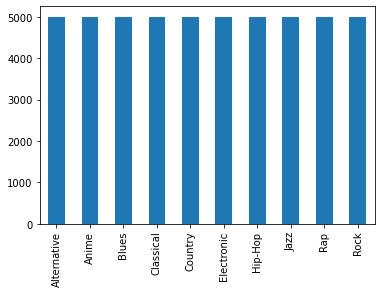

In [156]:
concatenate_dataset["music_genre"].value_counts().plot.bar()

In [157]:
# function of finding high correlation variables
def find_large_correlation(dataset):
    corr = dataset.corr()
    # Convert lower triangle of value of correlation matrix to NaN
    corr = \
    corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))
    # keep correlation absolute values that are less than 1 and greater than 1
    mask = corr.abs().lt(1) & corr.abs().gt(0.5)
    large_corr = pd.DataFrame(corr.where(mask).stack())
    return print("Large correlation between variables\n", large_corr)

In [158]:
# function of plotting heatmap
def plot_heatmap(dataset):
    dataset.corr()
    return sns.heatmap(dataset.corr(), cmap='Blues', annot = True)

In [159]:
def find_correlation(dataset):
    # correlation heatmap of alternative dataset
    plot_heatmap(dataset)
    plt.show()
    # large correlation between variables
    find_large_correlation(dataset)

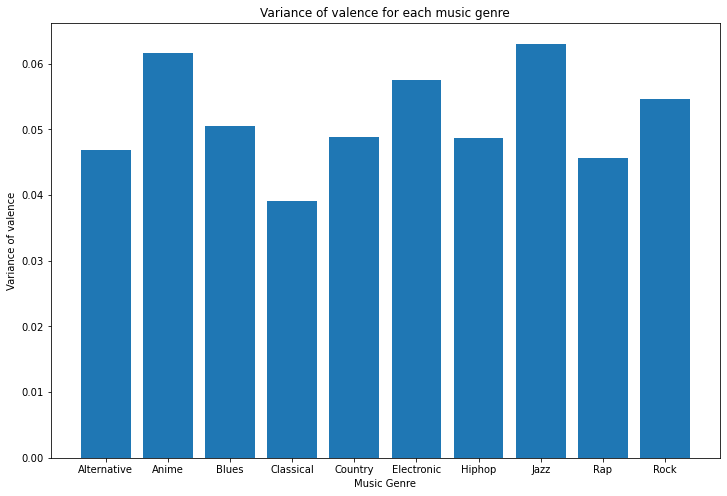

<AxesSubplot:xlabel='music_genre', ylabel='valence'>

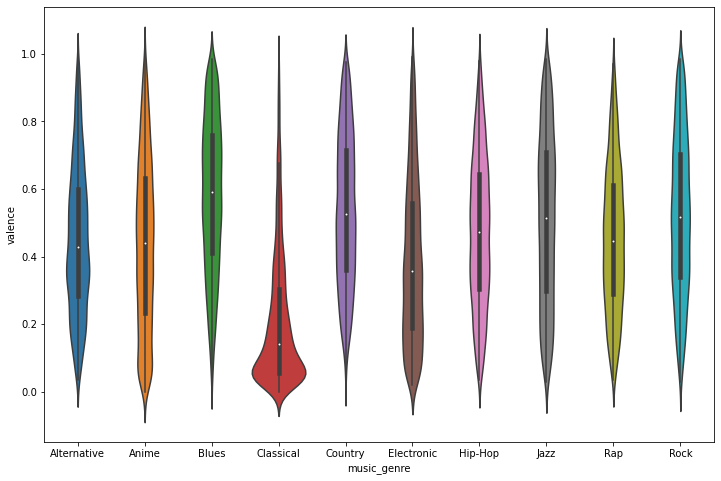

In [160]:
# variance of valence feature of each dataset. seeing which genre of song has largest
# discrepancy in valence, and which has smallest.
var_list = []
for i in datasets:
    valence_var = i['valence'].var()
    var_list.append(valence_var)

fig = plt.figure(figsize = (12,8))
plt.bar(datasets_name,var_list)
plt.xlabel('Music Genre')
plt.ylabel('Variance of valence')
plt.title('Variance of valence for each music genre')
plt.show()

fig = plt.figure(figsize = (12,8))
sns.violinplot(x='music_genre', y='valence', data = concatenate_dataset)

<AxesSubplot:xlabel='music_genre', ylabel='popularity'>

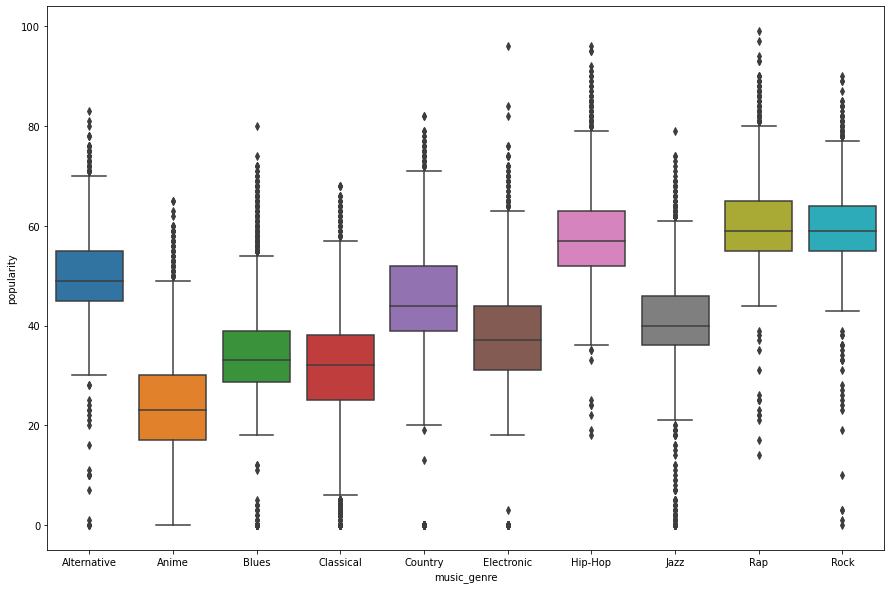

In [161]:
# popularity of each genre. seeing which genre of song is popular?
fig = plt.figure(figsize = (15,10))
sns.boxplot(x='music_genre', y='popularity', data = concatenate_dataset)

In [162]:
# function of plotting countplots
def count_plot(dataset, index, title):
    return sns.countplot(x = 'key',
                  data = dataset,
                  order = dataset['key'].value_counts().index,
                  ax = axes[index]).set_title(title)

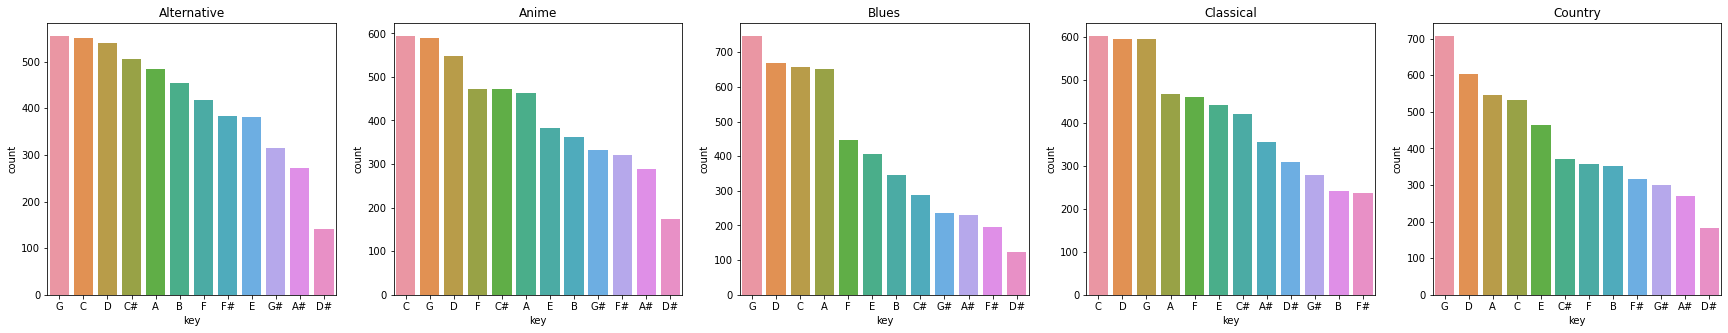

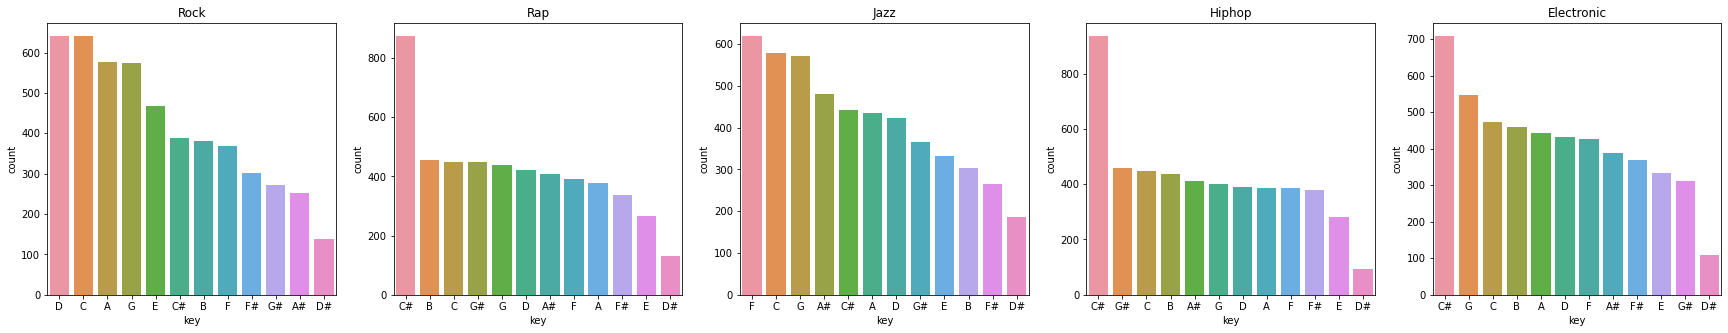

In [163]:
# plot the countplot of key feature
fig, axes = plt.subplots(1,5, figsize= (30,5))
for i, j, k in zip (datasets, range(0,5), datasets_name):
    count_plot(i, j, k)

fig, axes = plt.subplots(1,5, figsize= (30,5))
for i, j, k in zip (reversed(datasets), range(0,5), reversed(datasets_name)):
    count_plot(i, j, k)

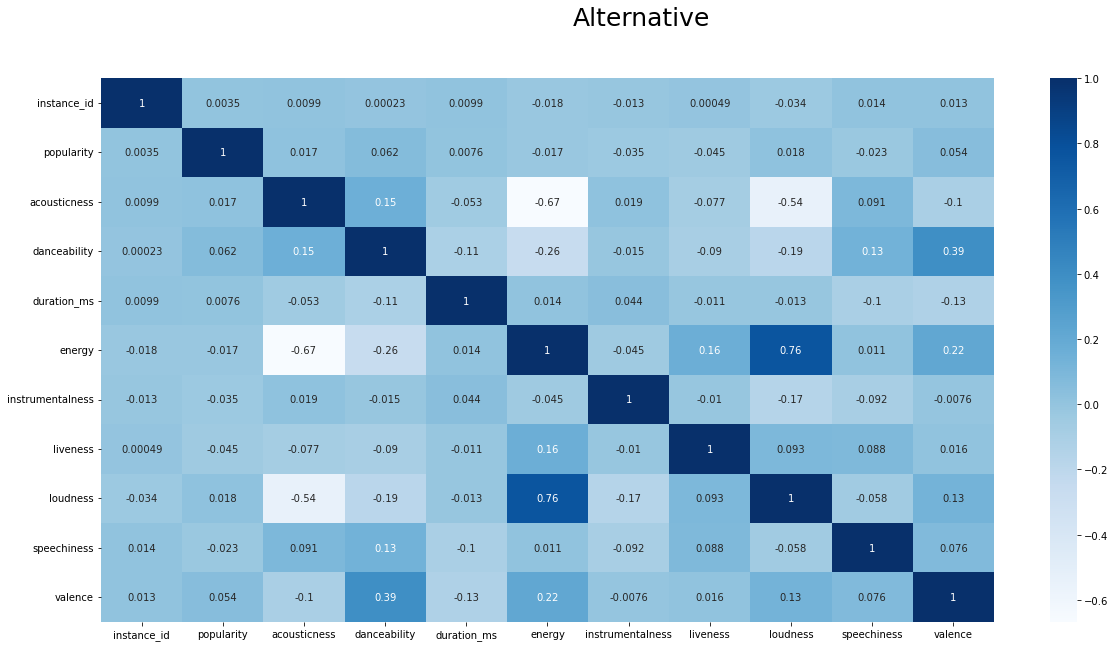

Large correlation between variables
                               0
acousticness energy   -0.667703
             loudness -0.540520
energy       loudness  0.762536


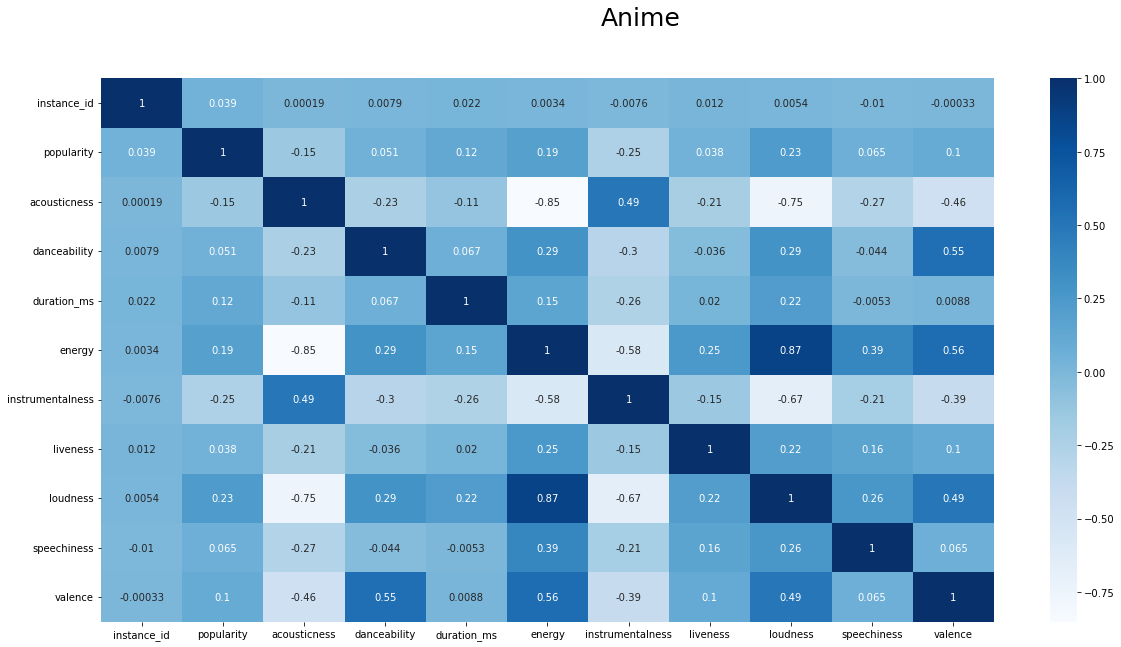

Large correlation between variables
                                           0
acousticness     energy           -0.852307
                 loudness         -0.752029
danceability     valence           0.549178
energy           instrumentalness -0.575415
                 loudness          0.869077
                 valence           0.559697
instrumentalness loudness         -0.670713


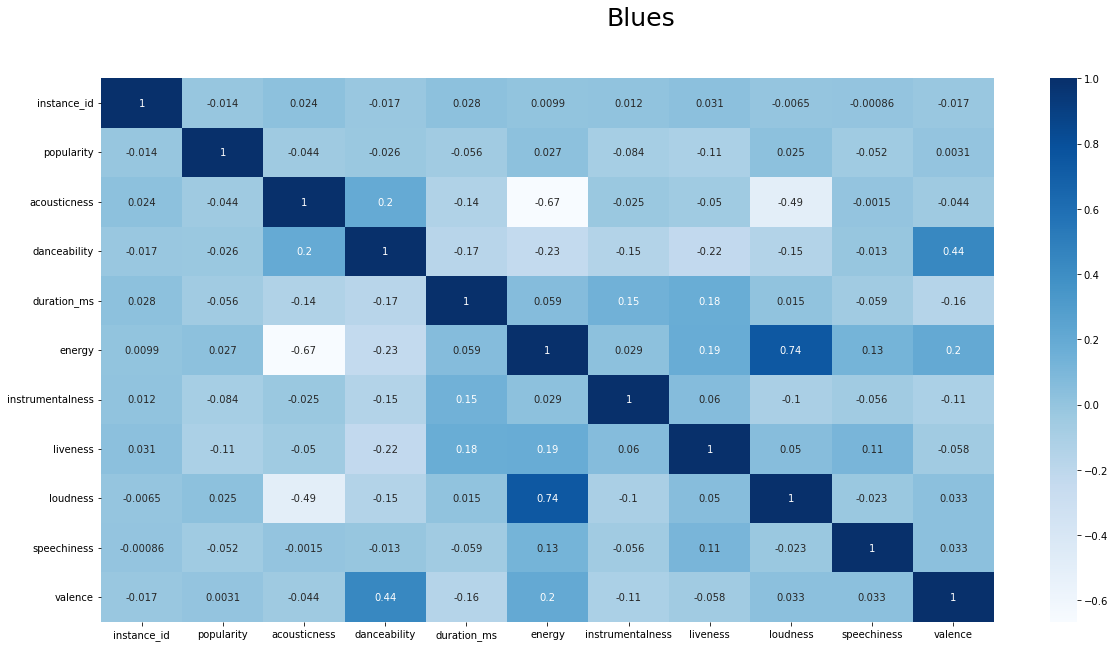

Large correlation between variables
                               0
acousticness energy   -0.666094
energy       loudness  0.743283


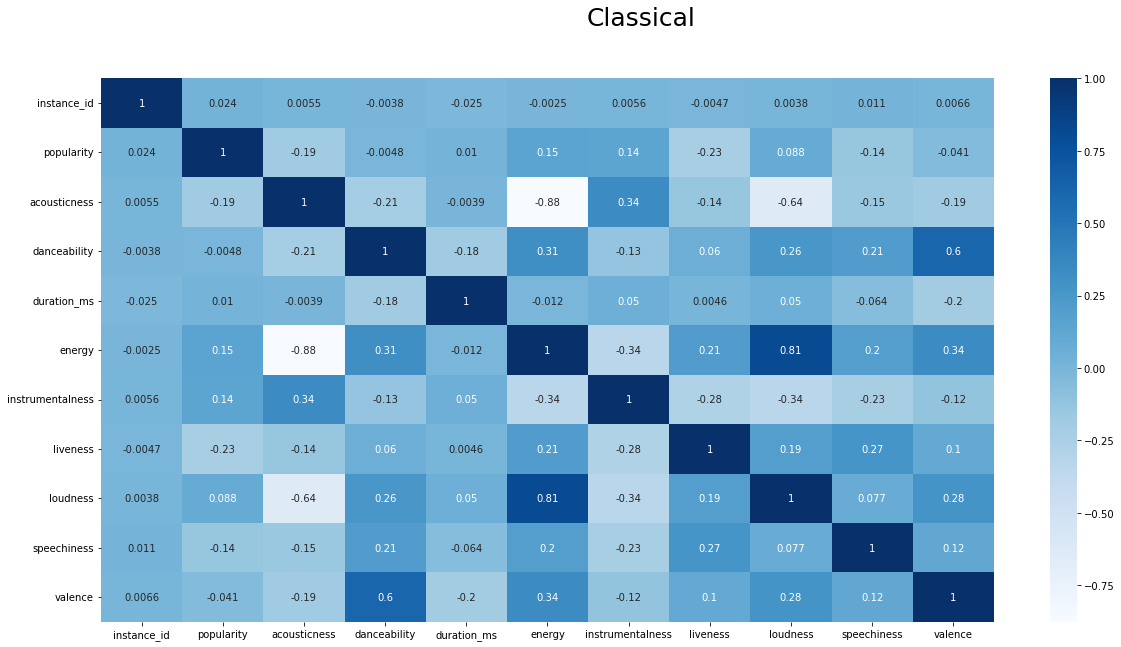

Large correlation between variables
                               0
acousticness energy   -0.876828
             loudness -0.635279
danceability valence   0.604954
energy       loudness  0.806327


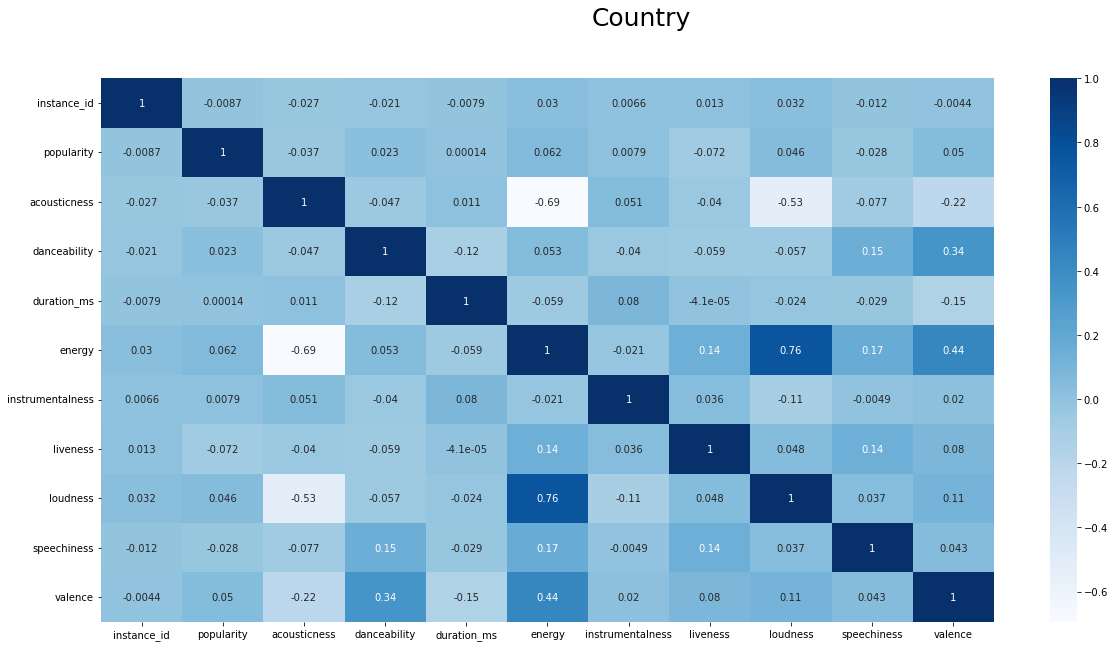

Large correlation between variables
                               0
acousticness energy   -0.694505
             loudness -0.525357
energy       loudness  0.761690


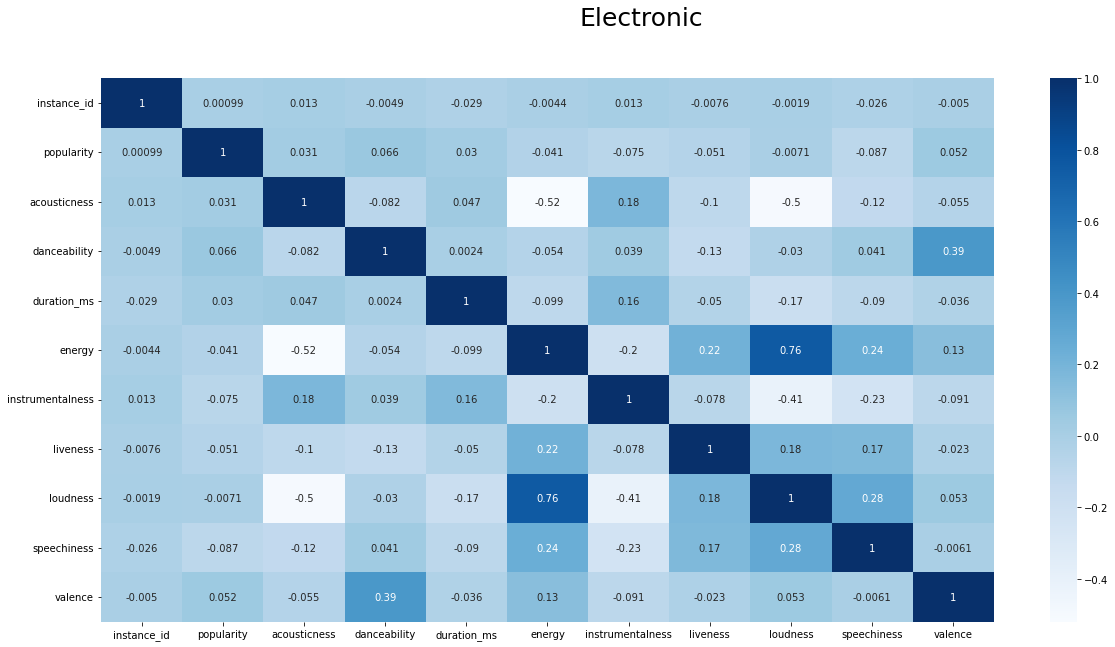

Large correlation between variables
                               0
acousticness energy   -0.519926
             loudness -0.500368
energy       loudness  0.755651


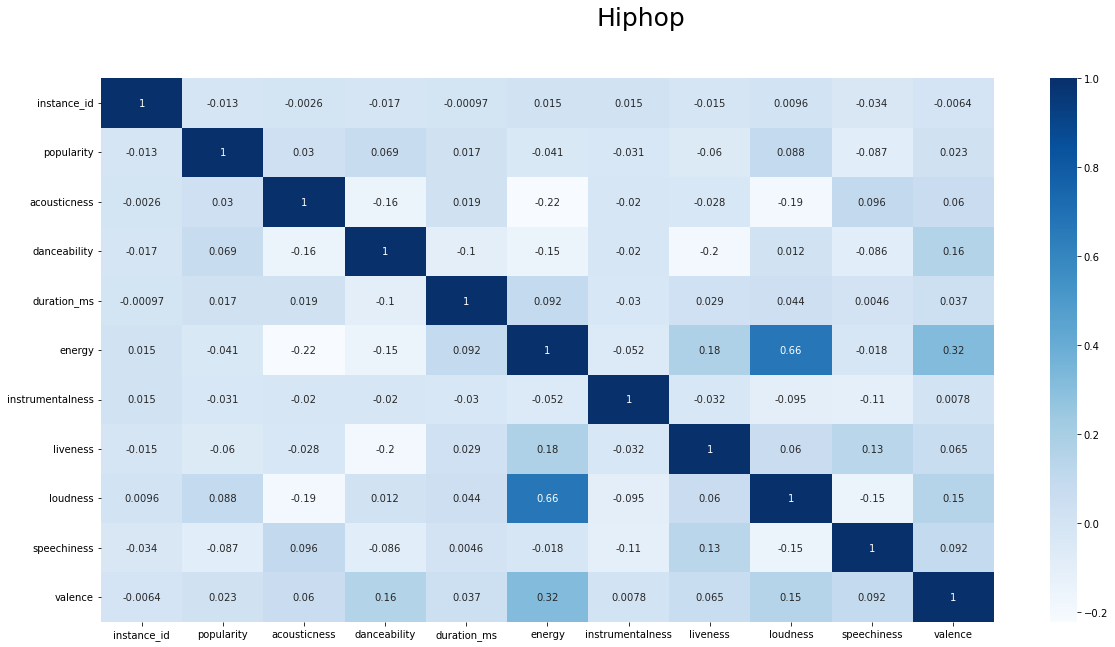

Large correlation between variables
                         0
energy loudness  0.664911


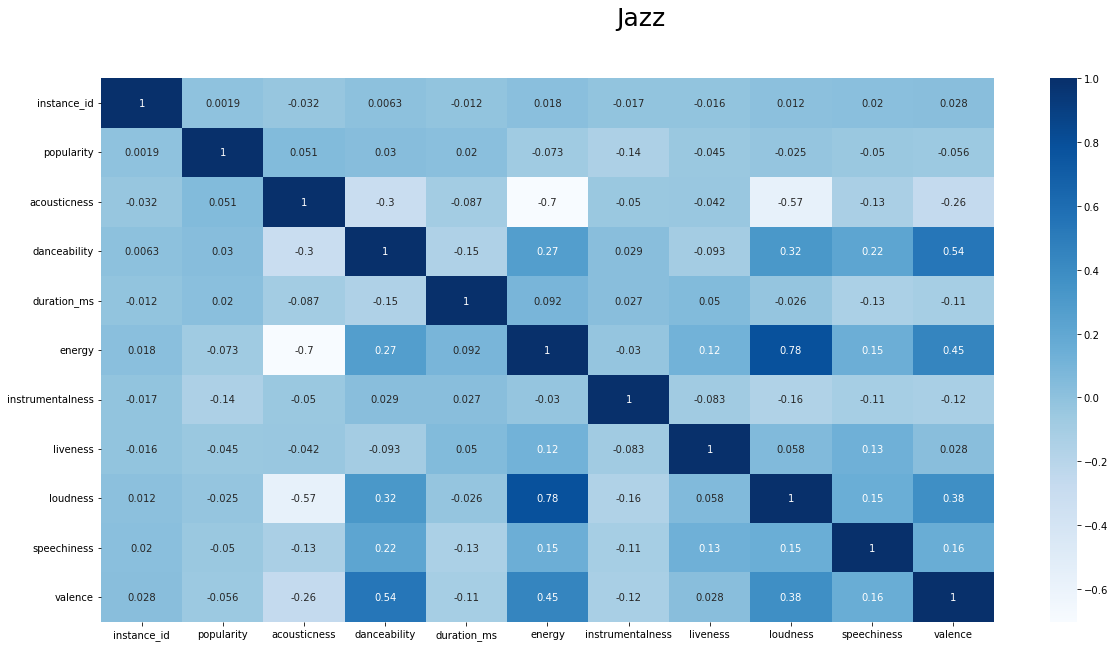

Large correlation between variables
                               0
acousticness energy   -0.703012
             loudness -0.568788
danceability valence   0.540215
energy       loudness  0.783115


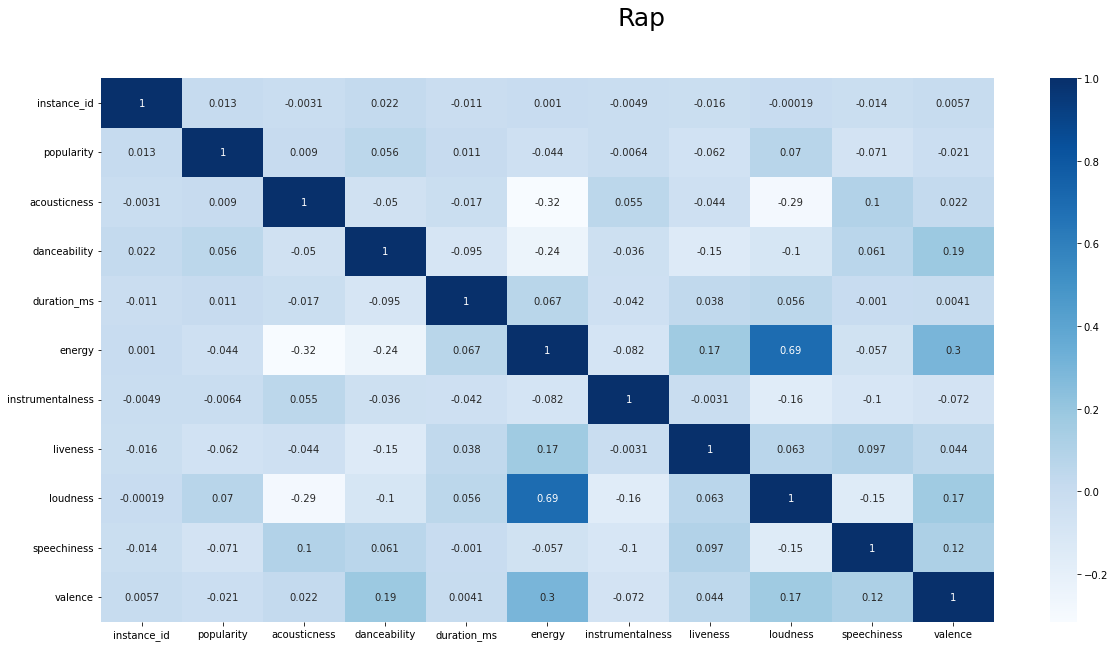

Large correlation between variables
                         0
energy loudness  0.692295


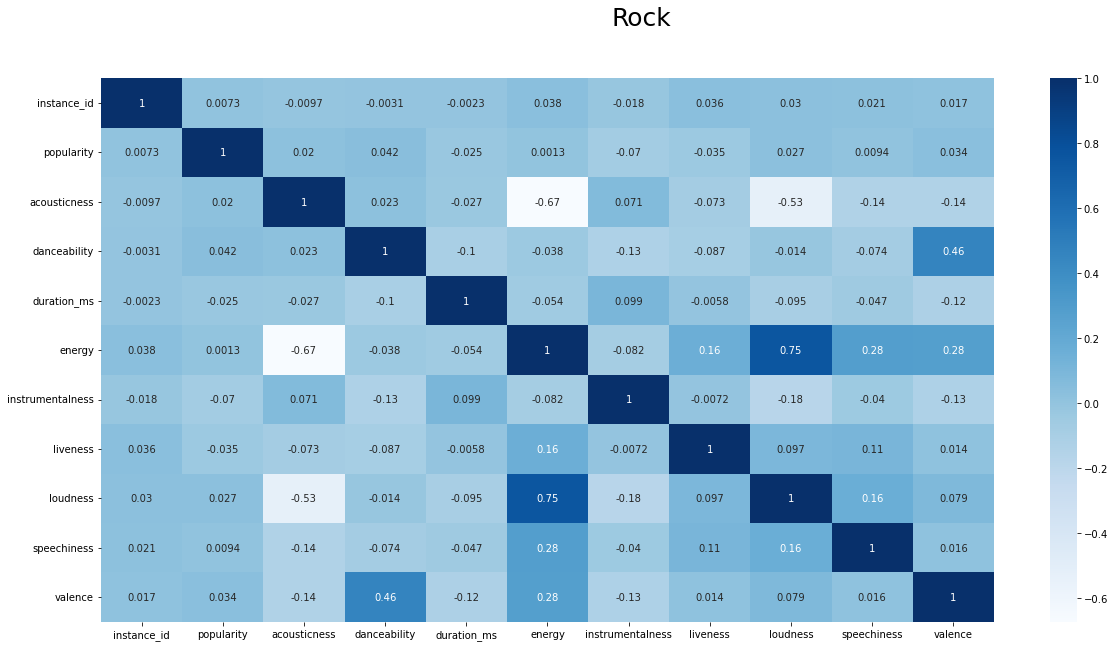

Large correlation between variables
                               0
acousticness energy   -0.674581
             loudness -0.525562
energy       loudness  0.754979


In [164]:
# plot heatmaps and print large correlation data
for i, j in zip(datasets_name, datasets):
    fig = plt.figure(figsize = (20,10))
    fig.suptitle(i, fontsize=25)
    find_correlation(j)

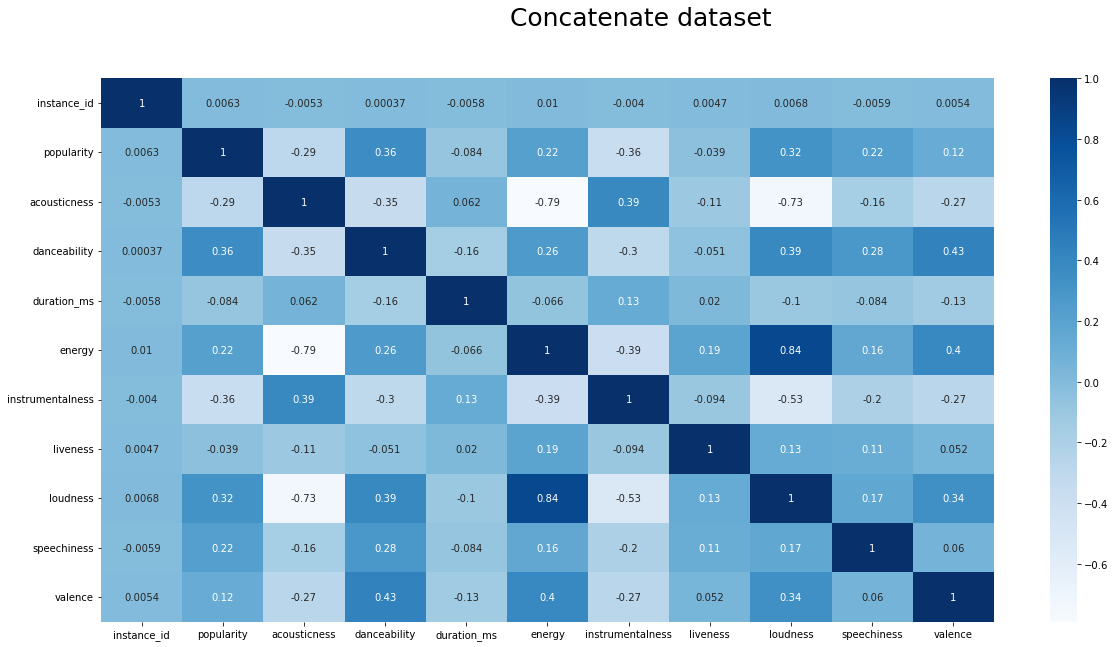

In [165]:
# plot heatmap of concatenate_dataset
fig = plt.figure(figsize = (20,10))
fig.suptitle('Concatenate dataset', fontsize=25)
sns.heatmap(concatenate_dataset.corr(), cmap='Blues', annot = True);

<AxesSubplot:xlabel='energy', ylabel='loudness'>

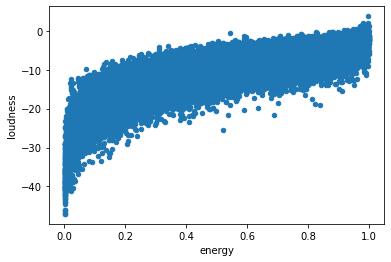

In [166]:
# scatterplot of largest correlation variable
concatenate_dataset.plot.scatter('energy', 'loudness')

In [433]:
# check null/na values
concatenate_dataset.isnull().sum()

instance_id             0
artist_name             0
track_hash              0
track_name              0
popularity            694
acousticness            1
danceability            0
duration_ms          4939
energy                  0
instrumentalness    15001
key                     0
liveness                0
loudness                1
mode                    0
speechiness             0
tempo                   0
obtained_date           0
valence                 2
music_genre             0
dtype: int64

In [406]:
# check missing values in duration_ms column
concatenate_dataset['duration_ms'].value_counts()

-1         4939
 240000      33
 192000      32
 180000      28
 216000      20
           ... 
 585573       1
 160187       1
 144987       1
 779133       1
 295516       1
Name: duration_ms, Length: 26028, dtype: int64

In [407]:
# check missing values in instrumentalness column
concatenate_dataset['instrumentalness'].value_counts()

0.000000    15001
0.898000       70
0.902000       69
0.897000       66
0.912000       66
            ...  
0.083300        1
0.000008        1
0.088200        1
0.087400        1
0.006930        1
Name: instrumentalness, Length: 5131, dtype: int64

In [408]:
# check missing values in tempo column
concatenate_dataset['tempo'].value_counts()

?                     4980
120.0                   17
140.007                 17
100.00299999999999      16
120.015                 15
                      ... 
102.565                  1
61.51                    1
71.37                    1
121.945                  1
142.061                  1
Name: tempo, Length: 29394, dtype: int64

In [8]:
# feature to be detected except for tempo.
# tempo feature can not be detected because it contain '?' in the column, which is non-numerical, needs to be imputed.
numerical_feature = ['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness',
                     'loudness','speechiness','tempo','valence']

In [ ]:
concatenate_dataset.to_csv('For handling outliers.csv', index = False)

In [362]:
dataset_without_outliers = pd.read_csv('after handling outliers.csv', na_values=missing_values)

In [363]:
# separate feature and target
X = dataset_without_outliers.iloc[:, :-1] # feature
y = dataset_without_outliers.iloc[:, -1]  # target

In [365]:
# Function of impute missing data using simple pandas method
def simple_data_impute (splited_dataset):
    splited_dataset['popularity']=splited_dataset['popularity'].fillna(splited_dataset['popularity'].mean())
    splited_dataset['duration_ms']=splited_dataset['duration_ms'].fillna(splited_dataset['duration_ms'].mean())
    splited_dataset['instrumentalness']=splited_dataset['instrumentalness'].fillna(splited_dataset['instrumentalness'].mean())
    splited_dataset['tempo']=splited_dataset['tempo'].fillna(splited_dataset['tempo'].mean())
    splited_dataset['acousticness']=splited_dataset['acousticness'].fillna(splited_dataset['acousticness'].mean())
    splited_dataset['loudness']=splited_dataset['loudness'].fillna(splited_dataset['loudness'].mean())
    splited_dataset['valence']=splited_dataset['valence'].fillna(splited_dataset['valence'].mean())

In [525]:
from sklearn.impute import KNNImputer
# Function of impute missing data using KNN Imputer
def KNN_Imputer(encoded_dataset):
    imputer = KNNImputer()
    completed_dataset = imputer.fit_transform(encoded_dataset)
    #The output is 'numpy.ndarray' so we convert it to dataframe for consistency
    completed_dataset=pd.DataFrame(completed_dataset, columns=encoded_dataset.columns)
    print("The number of missing values :\n", completed_dataset.isnull().sum())
    return completed_dataset

In [468]:
# Function of impute missing values using sklearn iterative imputer (MICE)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
def MICE(encoded_dataset):
    imputer = IterativeImputer()
    completed_dataset = imputer.fit_transform(encoded_dataset)
    #The output is 'numpy.ndarray' so we convert it to dataframe for consistency
    completed_dataset=pd.DataFrame(completed_dataset, columns=encoded_dataset.columns)
    print("The number of missing values :\n", completed_dataset.isnull().sum())
    return completed_dataset

In [358]:
# Function of encoding Categorical Data using ordinal encoding
def ordinal_encoding (splited_dataset):
    ordinal_encoder = OrdinalEncoder()
    ordinal_encoded = ordinal_encoder.fit_transform(splited_dataset.key.values.reshape(-1, 1))
    dfOrdinal = pd.DataFrame(ordinal_encoded)
    splited_dataset.insert(loc = 7, column = 'OrdinalEncoded_Key', value = dfOrdinal)

In [359]:
# Function of Z-Score Normalisation
def z_score_normalisation (splited_dataset):
    scaler = StandardScaler()

    # scale each numerical_feature
    scale_popularity = scaler.fit_transform(splited_dataset.popularity.values.reshape(-1, 1))
    scale_acousticness = scaler.fit_transform(splited_dataset.acousticness.values.reshape(-1, 1))
    scale_danceability = scaler.fit_transform(splited_dataset.danceability.values.reshape(-1, 1))
    scale_duration_ms = scaler.fit_transform(splited_dataset.duration_ms.values.reshape(-1, 1))
    scale_energy = scaler.fit_transform(splited_dataset.energy.values.reshape(-1, 1))
    scale_instrumentalness = scaler.fit_transform(splited_dataset.instrumentalness.values.reshape(-1, 1))
    scale_liveness = scaler.fit_transform(splited_dataset.liveness.values.reshape(-1, 1))
    scale_loudness = scaler.fit_transform(splited_dataset.loudness.values.reshape(-1, 1))
    scale_speechiness = scaler.fit_transform(splited_dataset.speechiness.values.reshape(-1, 1))
    scale_tempo = scaler.fit_transform(splited_dataset.tempo.values.reshape(-1, 1))
    scale_valence = scaler.fit_transform(splited_dataset.valence.values.reshape(-1, 1))

    scale_numerical_feature = [scale_popularity, scale_acousticness, scale_danceability, scale_duration_ms,
                                scale_energy, scale_instrumentalness, scale_liveness, scale_loudness,
                                scale_speechiness, scale_tempo, scale_valence]

    # replace each numerical_feature with scale_numerical_feature
    for i, j in zip(numerical_feature, scale_numerical_feature):
        splited_dataset[i] = j

In [556]:
from sklearn.decomposition import PCA
# Function of PCA
def PCA_standardizer(feature_dataset):
    scaler = StandardScaler()
    feature_dataset_ss = scaler.fit_transform(feature_dataset)
    pca = PCA(n_components=2)
    feature_dataset = pca.fit_transform(feature_dataset_ss)
    feature_dataset_df = pd.DataFrame(feature_dataset)
    return feature_dataset_df

In [708]:
# train test split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

For training feature dataset:

In [709]:
# remove irrelevant features
X_train_1 = X_train.drop(columns = ['instance_id', 'artist_name', 'track_hash', 'track_name', 'obtained_date'])

# simple data imputation
#simple_data_impute(X_train_1)

# Ordinal Encoding to key feature
ordinal_encoding(X_train_1)

# One hot encoding to mode feature
X_train_1 = pd.get_dummies(X_train_1, columns=['mode'])

X_train_1 = X_train_1.drop(columns=['key'])

#X_train_1 = KNN_Imputer(X_train_1)

X_train_1 = MICE(X_train_1)

#X_train_1 = PCA_standardizer(X_train_1)

# Z-Score Normalisation
#z_score_normalisation(X_train_1)

The number of missing values :
 popularity            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
OrdinalEncoded_Key    0
liveness              0
loudness              0
speechiness           0
tempo                 0
valence               0
mode_Major            0
mode_Minor            0
dtype: int64


In [621]:
X_train_1

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,OrdinalEncoded_Key,liveness,loudness,speechiness,tempo,valence,mode_Major,mode_Minor
39959,62.0,0.100000,0.5390,242678.960117,0.8940,0.000017,0.0,0.1000,-4.483,0.0469,90.004000,0.5090,0,1
5643,18.0,0.893000,0.1710,188133.000000,0.3620,0.928000,0.0,0.0866,-10.668,0.0335,115.404000,0.0757,1,0
12240,38.0,0.000833,0.5200,173840.000000,0.8370,0.000440,3.0,0.3730,-5.877,0.0461,111.715000,0.5160,1,0
22475,52.0,0.023500,0.6210,191920.000000,0.7600,0.000003,4.0,0.3590,-4.864,0.0364,119.942819,0.7570,1,0
7380,36.0,0.000997,0.4560,233053.000000,0.9220,0.259180,4.0,0.2100,-3.095,0.0425,154.968000,0.5210,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,39.0,0.939000,0.4980,174813.000000,0.5440,0.001810,5.0,0.2120,-9.892,0.0640,68.964000,0.7570,0,1
44732,66.0,0.003380,0.5770,215520.000000,0.8270,0.000647,10.0,0.2600,-7.540,0.0365,119.942819,0.1790,1,0
38158,59.0,0.001610,0.7640,105000.000000,0.5280,0.259180,4.0,0.1600,-7.247,0.2480,160.009000,0.6000,1,0
860,43.0,0.243000,0.5290,224973.000000,0.7970,0.259180,7.0,0.0508,-4.529,0.0386,119.942819,0.4360,1,0


For training target dataset:

In [710]:
# Ordinal Encoding to music_genre target dataset
y_train_1 = pd.DataFrame(y_train)
training_target_encoder = OrdinalEncoder()
ordinal_encoded = training_target_encoder.fit_transform(y_train_1.music_genre.values.reshape(-1, 1))
dfOrdinal = pd.DataFrame(ordinal_encoded)
y_train_1 = dfOrdinal

For validation feature dataset:

In [711]:
# remove irrelevant features of testing feature
X_test_1 = X_test.drop(columns = ['instance_id', 'artist_name', 'track_hash', 'track_name', 'obtained_date'])

# simple data imputation
#simple_data_impute(X_test_1)

# Ordinal Encoding to key feature
ordinal_encoding(X_test_1)

# encoding Categorical Data "mode" using one-hot encoding
X_test_1 = pd.get_dummies(X_test_1, columns=['mode'])

# drop original key column
X_test_1 = X_test_1.drop(columns=['key'])

#X_test_1 = KNN_Imputer(X_test_1)

X_test_1 = MICE(X_test_1)

#X_test_1 = PCA_standardizer(X_test_1)

# Z-Score Normalisation
#z_score_normalisation(X_test_1)

The number of missing values :
 popularity            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
OrdinalEncoded_Key    0
liveness              0
loudness              0
speechiness           0
tempo                 0
valence               0
mode_Major            0
mode_Minor            0
dtype: int64


In [713]:
X_test_1

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,OrdinalEncoded_Key,liveness,loudness,speechiness,tempo,valence,mode_Major,mode_Minor
0,38.0,0.835000,0.427,349640.0,0.330,0.000488,8.0,0.6250,-23.442,0.4180,129.445000,0.560,1.0,0.0
1,13.0,0.914000,0.285,554304.0,0.466,0.836000,8.0,0.9150,-12.703,0.0973,122.597000,0.193,1.0,0.0
2,37.0,0.656000,0.574,227467.0,0.498,0.000415,8.0,0.1110,-9.131,0.0256,174.177000,0.683,1.0,0.0
3,55.0,0.000303,0.416,222760.0,0.849,0.000042,11.0,0.1850,-3.833,0.0503,144.844000,0.677,1.0,0.0
4,53.0,0.056000,0.852,226296.0,0.535,0.005060,9.0,0.0974,-7.222,0.0568,111.992000,0.374,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13727,72.0,0.090400,0.710,120019.0,0.648,-0.071698,11.0,0.2660,-7.310,0.2310,160.061000,0.410,1.0,0.0
13728,26.0,0.084800,0.538,186213.0,0.951,0.109185,6.0,0.4240,-3.463,0.1490,134.351451,0.769,1.0,0.0
13729,58.0,0.032100,0.617,154747.0,0.534,0.000007,8.0,0.1900,-9.672,0.1460,116.980000,0.469,0.0,1.0
13730,29.0,0.051000,0.318,315833.0,0.658,0.915000,2.0,0.0546,-13.059,0.0359,134.848000,0.141,0.0,1.0


For validation target dataset:

In [715]:
# Ordinal Encoding to music_genre target dataset
y_test_1 = pd.DataFrame(y_test)
validation_target_encoder = OrdinalEncoder()
ordinal_encoded = validation_target_encoder.fit_transform(y_test_1.music_genre.values.reshape(-1, 1))
dfOrdinal = pd.DataFrame(ordinal_encoded)
y_test_1 = dfOrdinal

For testing dataset

In [714]:
testing = pd.read_csv("testing-instances.csv", na_values = missing_values)

In [716]:
# get instance_id column
instance_id_column = testing.iloc[:,0]
instance_id_column = pd.DataFrame(instance_id_column)

# remove irrelevant features
testing_1 = testing.drop(columns = ['instance_id','artist_name', 'track_hash', 'track_name',
                                  'obtained_date'])

# simple data imputation
#simple_data_impute(testing_1)

# Ordinal Encoding to key feature
ordinal_encoding(testing_1)

testing_1 = pd.get_dummies(testing_1, columns=['mode'])

testing_1 = testing_1.drop(columns=['key'])

#testing_1 = KNN_Imputer(testing_1)

testing_1 = MICE(testing_1)

#testing_1 = PCA_standardizer(testing_1)

# Z-Score Normalisation
#z_score_normalisation(testing_1)

The number of missing values :
 popularity            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
OrdinalEncoded_Key    0
liveness              0
loudness              0
speechiness           0
tempo                 0
valence               0
mode_Major            0
mode_Minor            0
dtype: int64


In [626]:
testing_1

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,OrdinalEncoded_Key,liveness,loudness,speechiness,tempo,valence,mode_Major,mode_Minor
0,20.0,0.713000,0.298,173973.000000,0.370,0.937000,1.0,0.161,-10.885,0.0346,123.308000,0.1270,1,0
1,29.0,0.408000,0.662,490653.000000,0.528,0.868000,7.0,0.110,-15.635,0.0615,119.999121,0.5090,0,1
2,5.0,0.947000,0.307,216973.000000,0.111,0.625000,6.0,0.804,-20.268,0.0346,82.459000,0.0702,1,0
3,46.0,0.000345,0.268,316147.000000,0.966,0.000007,2.0,0.291,-3.146,0.0719,130.034000,0.5670,0,1
4,44.0,0.363000,0.709,202667.000000,0.624,0.000031,1.0,0.109,-6.065,0.2890,91.079000,0.8640,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,66.0,0.042800,0.667,230693.000000,0.581,0.261652,3.0,0.183,-5.164,0.3230,110.953000,0.3680,0,1
19996,34.0,0.176000,0.516,150787.000000,0.830,0.000132,1.0,0.883,-8.539,0.1960,134.276000,0.3120,0,1
19997,48.0,0.003640,0.227,244727.571564,0.853,0.000106,9.0,0.665,-3.424,0.0949,169.510000,0.4190,0,1
19998,16.0,0.120000,0.616,82600.000000,0.578,0.435000,10.0,0.228,-8.438,0.0378,119.422000,0.9520,0,1


In [671]:
# repeat 20 time for getting more accurate results
score_list = []
for i in range(20):
    # train test split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # remove irrelevant features
    X_train_1 = X_train.drop(columns = ['instance_id', 'artist_name', 'track_hash', 'track_name', 'obtained_date'])

    # simple data imputation
    simple_data_impute(X_train_1)

    # Ordinal Encoding to key feature
    ordinal_encoding(X_train_1)

    # One hot encoding to mode feature
    X_train_1 = pd.get_dummies(X_train_1, columns=['mode'])

    X_train_1 = X_train_1.drop(columns=['key'])

    # Ordinal Encoding to music_genre target dataset
    y_train_1 = pd.DataFrame(y_train)
    training_target_encoder = OrdinalEncoder()
    ordinal_encoded = training_target_encoder.fit_transform(y_train_1.music_genre.values.reshape(-1, 1))
    dfOrdinal = pd.DataFrame(ordinal_encoded)
    y_train_1 = dfOrdinal

    # remove irrelevant features of testing feature
    X_test_1 = X_test.drop(columns = ['instance_id', 'artist_name', 'track_hash', 'track_name', 'obtained_date'])

    # simple data imputation
    simple_data_impute(X_test_1)

    # Ordinal Encoding to key feature
    ordinal_encoding(X_test_1)

    # encoding Categorical Data "mode" using one-hot encoding
    X_test_1 = pd.get_dummies(X_test_1, columns=['mode'])

    # drop original key column
    X_test_1 = X_test_1.drop(columns=['key'])

    # Ordinal Encoding to music_genre target dataset
    y_test_1 = pd.DataFrame(y_test)
    validation_target_encoder = OrdinalEncoder()
    ordinal_encoded = validation_target_encoder.fit_transform(y_test_1.music_genre.values.reshape(-1, 1))
    dfOrdinal = pd.DataFrame(ordinal_encoded)
    y_test_1 = dfOrdinal

    # get instance_id column
    instance_id_column = testing.iloc[:,0]
    instance_id_column = pd.DataFrame(instance_id_column)

    # remove irrelevant features
    testing_1 = testing.drop(columns = ['instance_id','artist_name', 'track_hash', 'track_name',
                                      'obtained_date'])
    # simple data imputation
    simple_data_impute(testing_1)

    # Ordinal Encoding to key feature
    ordinal_encoding(testing_1)

    testing_1 = pd.get_dummies(testing_1, columns=['mode'])

    testing_1 = testing_1.drop(columns=['key'])

    # apply classifier with best parameters
    clf = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_iter=900)
    clf.fit(X_train_1, y_train_1.values.ravel())
    clf_score = clf.score(X_test_1, y_test_1)
    score_list.append(clf_score)

In [667]:
# average score
np.mean(score_list)

0.5772174482959511

In [407]:
##  ,GradientBoostingClassifier(), HistGradientBoostingClassifier(),RandomForestClassifier(), MLPClassifier()]

In [421]:
# apply classifier
'''
score_list = []
for i in classifiers:
    clf = i
    clf.fit(X_train_1, y_train_1)
    clf_score = clf.score(X_test_1, y_test_1)
    score_list.append(clf_score)
'''

In [424]:
# hyperparameter Tuning
hgbc = HistGradientBoostingClassifier()
parameters = {
    "max_iter": [100,300,500,700,900],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [425]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(hgbc,parameters,cv=5)
clf.fit(X_train_1, y_train_1.values.ravel())

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_iter': [100, 300, 500, 700, 900]})

In [426]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 900}


In [717]:
# apply classifier with best parameters
clf = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_iter=900)
clf.fit(X_train_1, y_train_1.values.ravel())

HistGradientBoostingClassifier(max_depth=3, max_iter=900)

In [718]:
clf_score = clf.score(X_test_1, y_test_1)

In [719]:
print(clf_score)

0.5738421205942325


In [410]:
#print(score_list)

[0.458855228662977, 0.45572385668511506, 0.5192251674919895, 0.42972618700844745, 0.569691232158462, 0.5412904165452956, 0.5432566268569764, 0.5710748616370521]


In [720]:
prediction = clf.predict(testing_1)
print(prediction)

[1. 5. 3. ... 0. 1. 8.]


In [721]:
reshape_prediction = prediction.reshape(20000, 1)
print(reshape_prediction)

[[1.]
 [5.]
 [3.]
 ...
 [0.]
 [1.]
 [8.]]


In [722]:
music_genre_predict = training_target_encoder.inverse_transform(reshape_prediction)

music_genre_predict_1 = pd.DataFrame(music_genre_predict)

music_genre_predict_1.columns = ['music_genre']

In [723]:
music_genre_predict_1

,music_genre
0,Anime
1,Electronic
2,Classical
3,Classical
4,Jazz
...,...
19995,Rap
19996,Blues
19997,Alternative
19998,Anime


In [724]:
music_genre_predict_1.insert(loc = 0, column = 'instance_id', value = instance_id_column)

In [725]:
music_genre_predict_1.to_csv('Prediction.csv', index = False)